In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [5]:
customers = pd.read_csv(r'C:\Users\HP\Downloads\Customers.csv')
products = pd.read_csv(r'C:\Users\HP\Downloads\Products.csv')
transactions = pd.read_csv(r'C:\Users\HP\Downloads\Transactions.csv')

print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [6]:
customers.isnull().sum()
products.isnull().sum()
transactions.isnull().sum()


TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [7]:
customers.fillna('Unknown', inplace=True)
transactions.dropna(inplace=True)


In [8]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [9]:
customers.describe()
products.describe()
transactions.describe()


,TransactionDate,Quantity,TotalValue,Price
count,1000,1000.000000,1000.000000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000
std,NaN,1.117981,493.144478,140.73639


In [10]:
customers.dtypes
products.dtypes
transactions.dtypes


TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object

<Axes: xlabel='Price', ylabel='Count'>

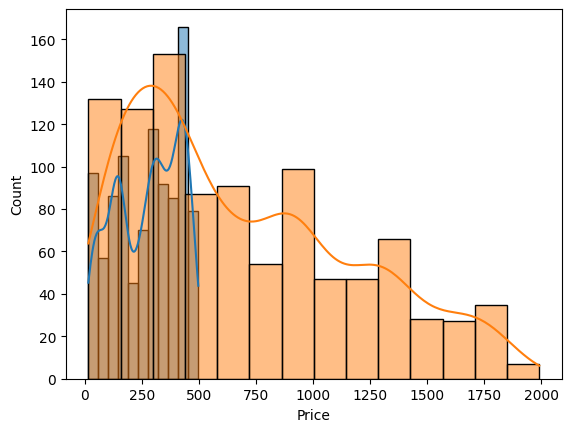

In [11]:
sns.histplot(transactions['Price'], kde=True)
sns.histplot(transactions['TotalValue'], kde=True)


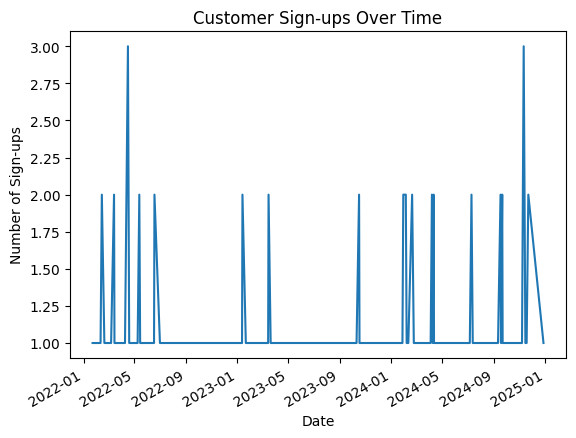

In [12]:
customers['SignupDate'].value_counts().sort_index().plot()
plt.title('Customer Sign-ups Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sign-ups')
plt.show()


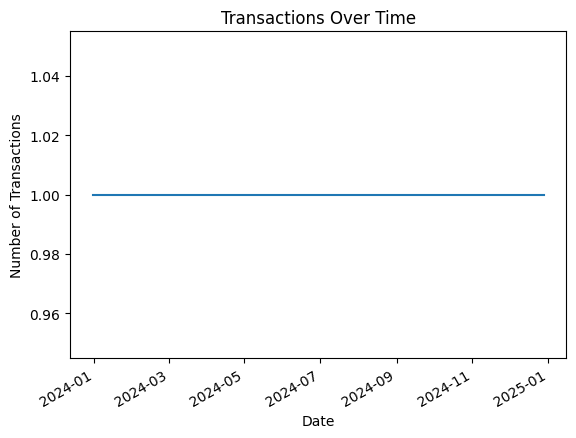

In [13]:
transactions['TransactionDate'].value_counts().sort_index().plot()
plt.title('Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()


In [14]:
product_sales = transactions.groupby('ProductID')['Quantity'].sum().reset_index()
popular_products = product_sales.sort_values(by='Quantity', ascending=False)
print(popular_products.head())


   ProductID  Quantity
58      P059        46
53      P054        46
28      P029        45
78      P079        43
60      P061        43


<Axes: xlabel='Category', ylabel='Quantity'>

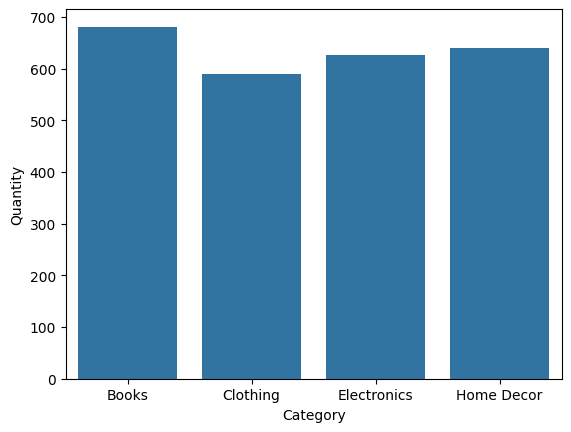

In [15]:
product_category_sales = transactions.merge(products[['ProductID', 'Category']], on='ProductID')
category_sales = product_category_sales.groupby('Category')['Quantity'].sum().reset_index()
sns.barplot(data=category_sales, x='Category', y='Quantity')


<Axes: xlabel='Region', ylabel='TotalValue'>

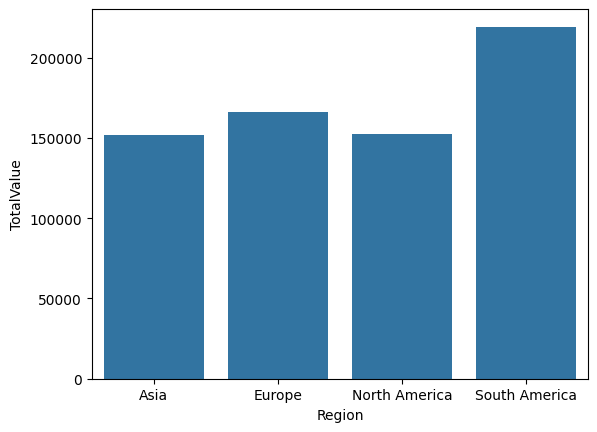

In [16]:
customer_region_sales = transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID')
region_sales = customer_region_sales.groupby('Region')['TotalValue'].sum().reset_index()
sns.barplot(data=region_sales, x='Region', y='TotalValue')
